# Project 2: Understanding the Significance of Covid-19 Symptoms
Rachel Hillner & Veronica Thordardottir

In [274]:
import csv
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


matrix = []


In [291]:
# Import
data = pd.read_csv('covid_data.csv')

# drop irrelavent columns
data = data.drop(['Country'], axis = 1)

# Split into X (Symptoms) and y (Covid? Yes or No)
X = data.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe'], axis = 1).astype(float)

# splitting into classes based on whether they have covid or not
# ignoring severity for intial testing
y = data.iloc[:,21].astype(float)
print('max y:', np.max(y))
print('min y:', np.min(y))
print('\ny:\n',y)
print('\nCovid positive if 0')

# Split into train/test/dev sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.40, random_state = 1)
(devX, testX, devY, testY) = train_test_split(testX, testY, test_size = 0.50, random_state = 1)

print('\nTraining set dimensions')
print(trainX.shape, trainY.shape)

print('\nDev set dimensions')
print(devX.shape, devY.shape)

print('\nTest set dimensions')
print(testX.shape, testY.shape)

# Defining column names, will use for feature importance
colnames = ['Fever',  'Tiredness',  'Dry-Cough',  'Difficulty-in-Breathing',  'Sore-Throat', 'None_Sympton',  'Pains',  'Nasal-Congestion',
            'Runny-Nose',  'Diarrhea', 'None_Experiencing',  'Contact_Dont-Know',  'Contact_No',  'Contact_Yes']

max y: 1.0
min y: 0.0

y:
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
316795    0.0
316796    0.0
316797    1.0
316798    1.0
316799    1.0
Name: Severity_None, Length: 316800, dtype: float64

Covid positive if 0

Training set dimensions
(190080, 22) (190080,)

Dev set dimensions
(63360, 22) (63360,)

Test set dimensions
(63360, 22) (63360,)



Predicted class labels:
 [0. 0. 0. ... 0. 0. 0.]

True class labels:
 139063    0.0
295782    0.0
102329    0.0
146650    1.0
117968    0.0
         ... 
4536      0.0
97696     0.0
104018    0.0
270391    0.0
229308    0.0
Name: Severity_None, Length: 63360, dtype: float64

Classification Report:

               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     47545
         1.0       0.00      0.00      0.00     15815

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360


Confusion Matrix:



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

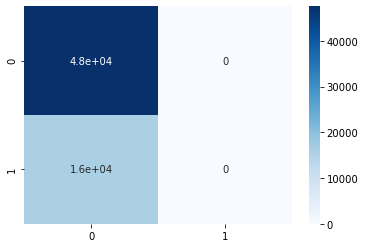

In [288]:
# predictions, Naive Bayes Classifier
gnb = GaussianNB()
y_pred = gnb.fit(trainX, trainY).predict(testX)

# print predicted and true class labels
print('\nPredicted class labels:\n', y_pred)
print('\nTrue class labels:\n', testY)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, y_pred))
print('\nConfusion Matrix:\n')

plt.figure()
sn.heatmap(confusion_matrix(testY, y_pred), cmap="Blues", annot = True)


Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.85      0.80     47545
           1       0.25      0.14      0.18     15815

    accuracy                           0.68     63360
   macro avg       0.50      0.50      0.49     63360
weighted avg       0.62      0.68      0.64     63360


Confusion Matrix:



<AxesSubplot:>

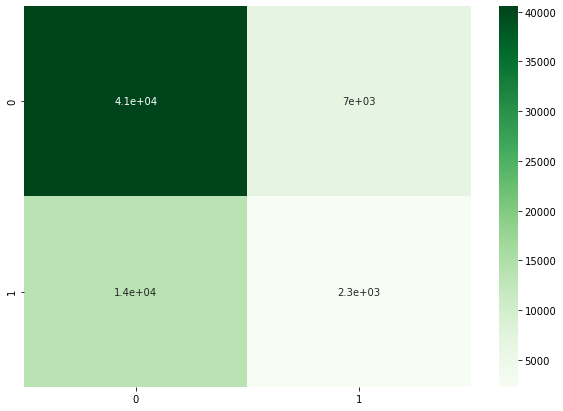

In [259]:
# predictions, knnc
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainY)

y_pred = neigh.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, y_pred))
print('\nConfusion Matrix:\n')

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(testY, y_pred), cmap=plt.cm.Greens, annot = True)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Training Classification Report:

               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86    142681
         1.0       0.00      0.00      0.00     47399

    accuracy                           0.75    190080
   macro avg       0.38      0.50      0.43    190080
weighted avg       0.56      0.75      0.64    190080



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Testing Classification Report:

               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     47545
         1.0       0.00      0.00      0.00     15815

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

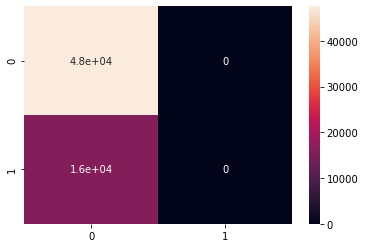

<Figure size 432x288 with 0 Axes>

In [289]:
# RandomForest

model = RandomForestClassifier()
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.figure()

* X[3] - Difficulty-in-Breathing
* X[7] - Nasal-Congestion
* X[6] - Pains
* X[9] - Diarrhea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Training Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86    142681
           1       0.00      0.00      0.00     47399

    accuracy                           0.75    190080
   macro avg       0.38      0.50      0.43    190080
weighted avg       0.56      0.75      0.64    190080


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.75      1.00      0.86     47545
           1       0.00      0.00      0.00     15815

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

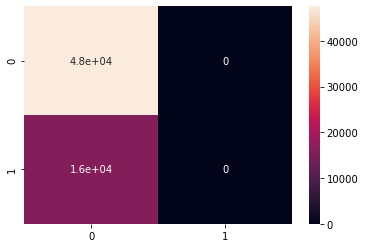

<Figure size 432x288 with 0 Axes>

In [256]:
# build the classifier using Decision Tree Classifier with 'best' alpha
model = DecisionTreeClassifier()

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.figure()

(342,)


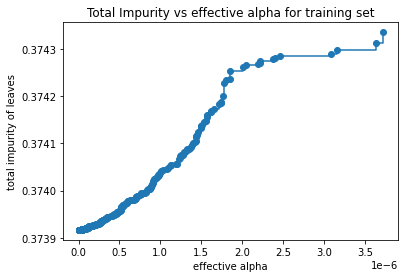

In [67]:
# create the classifier
clf = DecisionTreeClassifier(random_state=0)

# do cost-complexity pruning
path = clf.cost_complexity_pruning_path(trainX, trainY)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

print(ccp_alphas.shape)

In [68]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(trainX, trainY)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(trainX, trainY) for clf in clfs]
test_scores = [clf.score(testX, testY) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Decision Tree
plt.figure()
clf = DecisionTreeClassifier(ccp_alpha = 0.000003)
tree = clf.fit(trainX, trainY)
plot_tree(tree, filled=True)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Training Classification Report:

               precision    recall  f1-score   support

       False       0.00      0.00      0.00     47399
        True       0.75      1.00      0.86    142681

    accuracy                           0.75    190080
   macro avg       0.38      0.50      0.43    190080
weighted avg       0.56      0.75      0.64    190080



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Testing Classification Report:

               precision    recall  f1-score   support

       False       0.00      0.00      0.00     15815
        True       0.75      1.00      0.86     47545

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

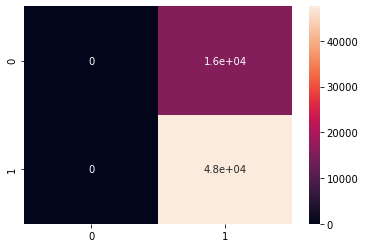

<Figure size 432x288 with 0 Axes>

In [139]:
# build the classifier using Decision Tree Classifier with 'best' alpha
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(ccp_alpha=3.5e-6))

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.figure()

In [ ]:
result = permutation_importance(model, testX, testY, n_repeats = 10, n_jobs = -1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert = False, labels = cancer.feature_names[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## Based on Severity

In [213]:
# Import
data = pd.read_csv('covid_data.csv')

# drop irrelavent columns
data = data.drop(['Country'], axis = 1)


# splitting data into 4 classes based on severity
data.loc[data['Severity_Mild'] == 1, 'Severity_Mild'] = 2
data.loc[data['Severity_Moderate'] == 1, 'Severity_Moderate'] = 3
data.loc[data['Severity_Severe'] == 1, 'Severity_Severe'] = 4

# Split into X (Symptoms) and y (Covid? Yes or No)
X = data.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_Severe', ], axis = 1)
y = data.iloc[:,19:23]
print(X)

# # splitting data into 4 classes based on severity
# data.loc[data['Severity_Mild'] == 1, 'Severity_Mild'] = 2
# data.loc[data['Severity_Moderate'] == 1, 'Severity_Moderate'] = 3
# data.loc[data['Severity_Severe'] == 1, 'Severity_Severe'] = 4

# y = y.query("Severity_None == 1")



y = y.drop(['Severity_None'], axis = 1)


# Summing previous 4 columns by row to turn into 1 column based on severity of case 
y = data.iloc[:,20:23].sum(axis=1)

# confirming the previous process worked 
print(y)
print(max(y))
print(min(y))

# Split into train/test/dev sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.40, random_state = 1)
(devX, testX, devY, testY) = train_test_split(testX, testY, test_size = 0.50, random_state = 1)

print('\nTraining set dimensions')
print(trainX.shape, trainY.shape)

print('\nDev set dimensions')
print(devX.shape, devY.shape)

print('\nTest set dimensions')
print(testX.shape, testY.shape)

# Defining column names, will use for feature importance
colnames = ['Fever',  'Tiredness',  'Dry-Cough',  'Difficulty-in-Breathing',  'Sore-Throat', 'None_Sympton',  'Pains',  'Nasal-Congestion',
            'Runny-Nose',  'Diarrhea', 'None_Experiencing',  'Contact_Dont-Know',  'Contact_No',  'Contact_Yes']

        Severity_Mild  Severity_Moderate  Severity_Severe
0                   2                  0                0
1                   2                  0                0
2                   2                  0                0
3                   0                  3                0
4                   0                  3                0
...               ...                ...              ...
316795              0                  0                4
316796              0                  0                4
316797              0                  0                0
316798              0                  0                0
316799              0                  0                0

[316800 rows x 3 columns]
0         2
1         2
2         2
3         3
4         3
         ..
316795    4
316796    4
316797    0
316798    0
316799    0
Length: 316800, dtype: int64
4
0

Training set dimensions
(190080, 22) (190080,)

Dev set dimensions
(63360, 22) (63360,)

Test set dimensions
(6

In [235]:
# Import
data = pd.read_csv('covid_data.csv')

# drop irrelavent columns
data = data.drop(['Country'], axis = 1)

# splitting data into 4 classes based on severity
data.loc[data['Severity_Mild'] == 1, 'Severity_Mild'] = 2
data.loc[data['Severity_Moderate'] == 1, 'Severity_Moderate'] = 3
data.loc[data['Severity_Severe'] == 1, 'Severity_Severe'] = 4


# Split into X (Symptoms) and y (Covid? Yes or No)
X = data[data['Severity_None'] < 1]
y = data[data['Severity_None'] < 1]


X = X.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_Severe', 'Severity_None'], axis = 1)
y = y.iloc[:,19:23]
print(y)
y = y.drop(['Severity_None'], axis = 1)

print(X.shape)
print(y.shape)

# data = data.reset_index(drop=True)

print(y)


# Summing previous 4 columns by row to turn into 1 column based on severity of case 
y = y.sum(axis=1)
y = y[y > 1]
# confirming the previous process worked 
print(y)
print(max(y))
print(min(y))

# Split into train/test/dev sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.40, random_state = 1)
(devX, testX, devY, testY) = train_test_split(testX, testY, test_size = 0.50, random_state = 1)

print('\nTraining set dimensions')
print(trainX.shape, trainY.shape)

print('\nDev set dimensions')
print(devX.shape, devY.shape)

print('\nTest set dimensions')
print(testX.shape, testY.shape)


        Severity_Mild  Severity_Moderate  Severity_None  Severity_Severe
0                   2                  0              0                0
1                   2                  0              0                0
2                   2                  0              0                0
3                   0                  3              0                0
4                   0                  3              0                0
...               ...                ...            ...              ...
316792              0                  3              0                0
316793              0                  3              0                0
316794              0                  0              0                4
316795              0                  0              0                4
316796              0                  0              0                4

[237600 rows x 4 columns]
(237600, 22)
(237600, 3)
        Severity_Mild  Severity_Moderate  Severity_Severe
0             

[Text(167.4, 195.696, 'X[3] <= 0.5\ngini = 0.75\nsamples = 190080\nvalue = [47399, 47583, 47528, 47570]'),
 Text(103.01538461538462, 152.208, 'X[12] <= 0.5\ngini = 0.75\nsamples = 94887\nvalue = [23550, 23795, 23844, 23698]'),
 Text(77.26153846153846, 108.72, 'X[9] <= 0.5\ngini = 0.75\nsamples = 75913\nvalue = [18934, 19013, 19035, 18931]'),
 Text(51.50769230769231, 65.232, 'X[19] <= 0.5\ngini = 0.75\nsamples = 48389\nvalue = [11995, 12171, 12175, 12048]'),
 Text(25.753846153846155, 21.744, 'gini = 0.75\nsamples = 32320\nvalue = [8090, 8089, 8123, 8018]'),
 Text(77.26153846153846, 21.744, 'gini = 0.75\nsamples = 16069\nvalue = [3905, 4082, 4052, 4030]'),
 Text(103.01538461538462, 65.232, 'gini = 0.75\nsamples = 27524\nvalue = [6939, 6842, 6860, 6883]'),
 Text(128.76923076923077, 108.72, 'gini = 0.75\nsamples = 18974\nvalue = [4616, 4782, 4809, 4767]'),
 Text(231.7846153846154, 152.208, 'X[4] <= 0.5\ngini = 0.75\nsamples = 95193\nvalue = [23849, 23788, 23684, 23872]'),
 Text(180.2769230

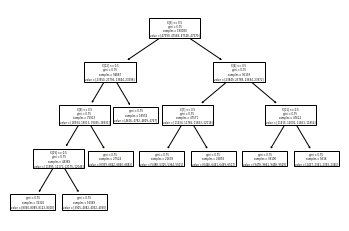

In [122]:
# Decision Tree
plt.figure()
clf = DecisionTreeClassifier(min_samples_split=40000)
tree = clf.fit(trainX, trainY)
plot_tree(tree, filled=True)

* X[3] - Difficulty in Breathing
* X[12] - Age 10-19
* X[9] - Diarrhea

[Text(186.0, 190.26, 'X[18] <= 0.5\ngini = 0.667\nsamples = 142560\nvalue = [47578, 47505, 47477]'),
 Text(111.60000000000001, 135.9, 'X[6] <= 0.5\ngini = 0.667\nsamples = 95022\nvalue = [31622, 31828, 31572]'),
 Text(74.4, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.667\nsamples = 60458\nvalue = [20226, 20219, 20013]'),
 Text(37.2, 27.180000000000007, 'gini = 0.667\nsamples = 30169\nvalue = [10147, 10105, 9917]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.667\nsamples = 30289\nvalue = [10079, 10114, 10096]'),
 Text(148.8, 81.53999999999999, 'gini = 0.667\nsamples = 34564\nvalue = [11396, 11609, 11559]'),
 Text(260.40000000000003, 135.9, 'X[15] <= 0.5\ngini = 0.667\nsamples = 47538\nvalue = [15956, 15677, 15905]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.667\nsamples = 38112\nvalue = [12814, 12495, 12803]'),
 Text(297.6, 81.53999999999999, 'gini = 0.667\nsamples = 9426\nvalue = [3142, 3182, 3102]')]

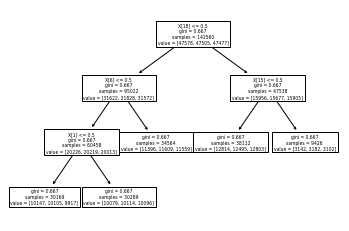

In [237]:
# Decision Tree
plt.figure()
clf = DecisionTreeClassifier(min_samples_split=40000)
tree = clf.fit(trainX, trainY)
plot_tree(tree, filled=True)

(5066,)


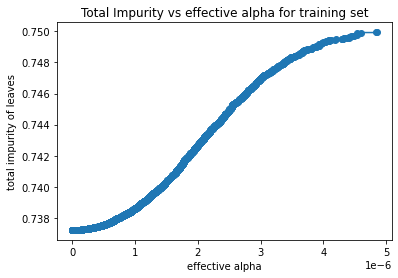

In [127]:
# create the classifier
clf = DecisionTreeClassifier(random_state=0)

# do cost-complexity pruning
path = clf.cost_complexity_pruning_path(trainX, trainY)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

print(ccp_alphas.shape)

In [128]:
clfs = []
for ccp_alpha in ccp_alphas[4900:5067]:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(trainX, trainY)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 4.881067273971256e-06


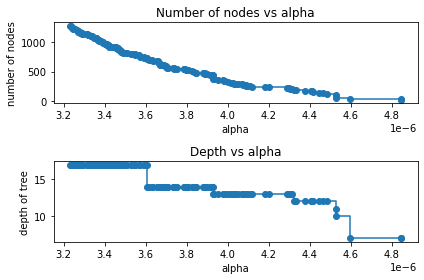

In [129]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[4900:5067]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

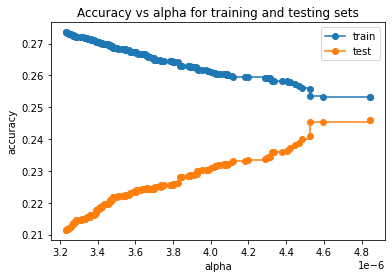

In [130]:
train_scores = [clf.score(trainX, trainY) for clf in clfs]
test_scores = [clf.score(testX, testY) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

[Text(155.44285714285715, 203.85, 'X[3] <= 0.5\ngini = 0.75\nsamples = 190080\nvalue = [47399, 47583, 47528, 47570]'),
 Text(131.52857142857144, 176.67000000000002, 'gini = 0.75\nsamples = 94887\nvalue = [23550, 23795, 23844, 23698]'),
 Text(179.35714285714286, 176.67000000000002, 'X[4] <= 0.5\ngini = 0.75\nsamples = 95193\nvalue = [23849, 23788, 23684, 23872]'),
 Text(119.57142857142857, 149.49, 'X[7] <= 0.5\ngini = 0.75\nsamples = 47571\nvalue = [11934, 11786, 11833, 12018]'),
 Text(95.65714285714286, 122.31, 'X[20] <= 0.5\ngini = 0.75\nsamples = 21678\nvalue = [5488, 5325, 5364, 5501]'),
 Text(47.82857142857143, 95.13, 'X[0] <= 0.5\ngini = 0.75\nsamples = 14466\nvalue = [3708, 3584, 3528, 3646]'),
 Text(23.914285714285715, 67.94999999999999, 'gini = 0.75\nsamples = 10863\nvalue = [2761, 2721, 2648, 2733]'),
 Text(71.74285714285715, 67.94999999999999, 'X[14] <= 0.5\ngini = 0.75\nsamples = 3603\nvalue = [947, 863, 880, 913]'),
 Text(47.82857142857143, 40.77000000000001, 'X[8] <= 0.5\n

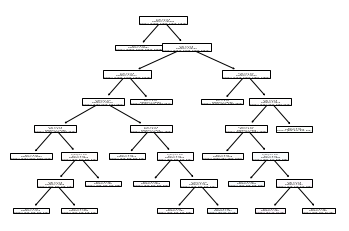

In [135]:
# Decision Tree with the chosen alpha
plt.figure()
clf = DecisionTreeClassifier(ccp_alpha=4.7e-6)
tree = clf.fit(trainX, trainY)
plot_tree(tree, filled=True)


Training Classification Report:

               precision    recall  f1-score   support

           1       0.26      0.17      0.20     47399
           2       0.26      0.32      0.29     47583
           3       0.26      0.22      0.24     47528
           4       0.26      0.33      0.29     47570

    accuracy                           0.26    190080
   macro avg       0.26      0.26      0.25    190080
weighted avg       0.26      0.26      0.25    190080


Testing Classification Report:

               precision    recall  f1-score   support

           1       0.23      0.15      0.18     15815
           2       0.24      0.31      0.27     15848
           3       0.24      0.19      0.21     16051
           4       0.24      0.31      0.27     15646

    accuracy                           0.24     63360
   macro avg       0.24      0.24      0.23     63360
weighted avg       0.24      0.24      0.23     63360


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

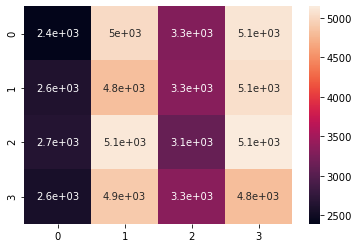

<Figure size 432x288 with 0 Axes>

In [136]:
# build the classifier using Decision Tree Classifier with 'best' alpha
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(ccp_alpha=4.7e-6))

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.figure()


Training Classification Report:

               precision    recall  f1-score   support

           1       0.31      0.31      0.31     47399
           2       0.31      0.32      0.32     47583
           3       0.31      0.31      0.31     47528
           4       0.31      0.32      0.32     47570

    accuracy                           0.31    190080
   macro avg       0.31      0.31      0.31    190080
weighted avg       0.31      0.31      0.31    190080


Testing Classification Report:

               precision    recall  f1-score   support

           1       0.15      0.15      0.15     15815
           2       0.15      0.16      0.16     15848
           3       0.15      0.15      0.15     16051
           4       0.15      0.15      0.15     15646

    accuracy                           0.15     63360
   macro avg       0.15      0.15      0.15     63360
weighted avg       0.15      0.15      0.15     63360


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

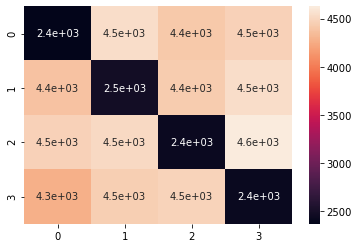

<Figure size 432x288 with 0 Axes>

In [137]:
# build the classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(ccp_alpha=4.7e-6), n_estimators = 100)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.figure()

In [209]:
col = np.zeros(22)
for i in range (len(col)):
    col[i] = 0 + i
print(col)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21.]


In [236]:
print(data)

        Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \

(5027,)


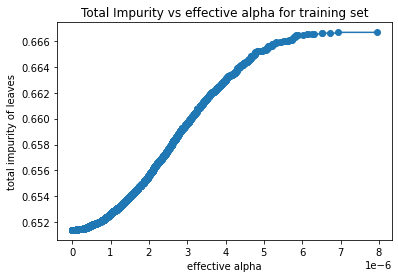

In [238]:
# create the classifier
clf = DecisionTreeClassifier(random_state=0)

# do cost-complexity pruning
path = clf.cost_complexity_pruning_path(trainX, trainY)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

print(ccp_alphas.shape)

In [239]:
clfs = []
for ccp_alpha in ccp_alphas[4900:5067]:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(trainX, trainY)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 8.964284362145136e-06


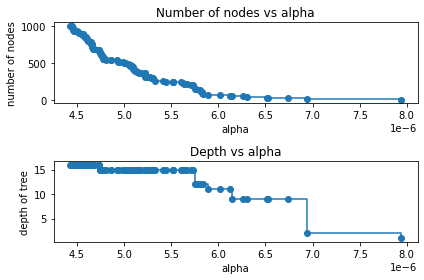

In [240]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[4900:5067]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

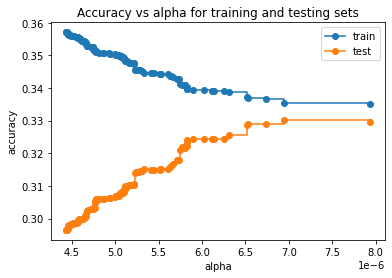

In [241]:
train_scores = [clf.score(trainX, trainY) for clf in clfs]
test_scores = [clf.score(testX, testY) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

[Text(133.92000000000002, 181.2, 'X[18] <= 0.5\ngini = 0.667\nsamples = 142560\nvalue = [47578, 47505, 47477]'),
 Text(66.96000000000001, 108.72, 'gini = 0.667\nsamples = 95022\nvalue = [31622, 31828, 31572]'),
 Text(200.88000000000002, 108.72, 'X[15] <= 0.5\ngini = 0.667\nsamples = 47538\nvalue = [15956, 15677, 15905]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.667\nsamples = 38112\nvalue = [12814, 12495, 12803]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.667\nsamples = 9426\nvalue = [3142, 3182, 3102]')]

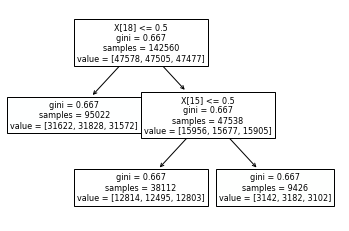

In [242]:
# Decision Tree with the chosen alpha
plt.figure()
clf = DecisionTreeClassifier(ccp_alpha=7.3e-6)
tree = clf.fit(trainX, trainY)
plot_tree(tree, filled=True)


Training Classification Report:

               precision    recall  f1-score   support

           2       0.34      0.28      0.31     47578
           3       0.34      0.53      0.41     47505
           4       0.34      0.20      0.25     47477

    accuracy                           0.34    142560
   macro avg       0.34      0.34      0.32    142560
weighted avg       0.34      0.34      0.32    142560


Testing Classification Report:

               precision    recall  f1-score   support

           2       0.32      0.27      0.29     15732
           3       0.33      0.52      0.40     15877
           4       0.32      0.18      0.23     15911

    accuracy                           0.32     47520
   macro avg       0.32      0.32      0.31     47520
weighted avg       0.32      0.32      0.31     47520


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

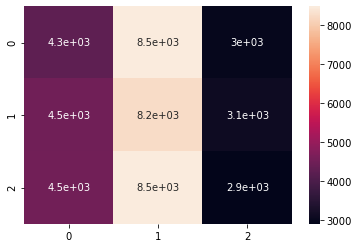

<Figure size 432x288 with 0 Axes>

In [244]:
# build the classifier using Decision Tree Classifier with 'best' alpha
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(ccp_alpha=7.3e-6))

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.figure()